In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report

In [2]:
# Load data from the file "loan_dataset.csv"
data = pd.read_csv ("loan_dataset.csv")

data.head ()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [3]:
data.tail ()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0
496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0
497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,$7482.0
498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0
499,LP002602,Male,No,0,Graduate,No,6283,4416.0,209.0,360.0,0.0,Rural,N,$10699.0


In [4]:
print (f"The shape of the dataset : {data.shape}")
print (f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")
print ("=======================================\n")

print (f"Data (variables) types :\n{data.dtypes}")
print ("=======================================\n")

print ("Descriptive statistics :\n")
data.describe ()

The shape of the dataset : (500, 14)
The dataset has 500 rows and 14 columns.

Data (variables) types :
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

Descriptive statistics :



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,482.000000,486.000000,459.000000
mean,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [5]:
data = data.drop (["Loan_ID"], axis = 1)

In [6]:
data ['Total_Income'] = data ['Total_Income'].str.replace ('$', '')
data ['Total_Income'] = data ['Total_Income'].apply (pd.to_numeric)
data ['Total_Income'].max ()

/tmp/ipykernel_8535/1853343318.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data ['Total_Income'] = data ['Total_Income'].str.replace ('$', '')


81000.0

In [7]:
data ['Dependents'] = data ['Dependents'].str.replace ('+', '')
data ['Dependents'] = data ['Dependents'].apply (pd.to_numeric)

/tmp/ipykernel_8535/479522468.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data ['Dependents'] = data ['Dependents'].str.replace ('+', '')


#### Handling Null/NaN Values

In [8]:
print ("==================================================")
print ("The number of missing values (na) in each column :")
print ("==================================================")
print (data.isna ().sum())

The number of missing values (na) in each column :
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64


In [9]:
# Columns with NaN values
nan_cols = [col for col in data.columns if data [col].isna ().sum () > 0]
for item in nan_cols :
    nans = data[item].isna ().sum ()
    nans_percentage = round ((nans / len (data)) * 100, 3)
    print (f"{item} has {nans} missing values, which represents {nans_percentage} % of the dataset")

Gender has 9 missing values, which represents 1.8 % of the dataset
Married has 3 missing values, which represents 0.6 % of the dataset
Dependents has 12 missing values, which represents 2.4 % of the dataset
Self_Employed has 27 missing values, which represents 5.4 % of the dataset
LoanAmount has 18 missing values, which represents 3.6 % of the dataset
Loan_Amount_Term has 14 missing values, which represents 2.8 % of the dataset
Credit_History has 41 missing values, which represents 8.2 % of the dataset


In [10]:
# Numerical columns
num_cols = data._get_numeric_data ().columns
for item in num_cols :
    print (item)

Dependents
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Total_Income


In [11]:
# Categorical columns
cat_cols = (data.drop (num_cols, axis = 1)).columns
for item in cat_cols :
    print (item)

Gender
Married
Education
Self_Employed
Property_Area
Loan_Status


In [12]:
# Handling numerical missing values
for item in num_cols :
    data [item].fillna (data [item].mean (), inplace = True)

In [13]:
for item in num_cols :
    nans = data[item].isna ().sum ()
    nans_percentage = round ((nans / len (data)) * 100, 3)
    print (f"{item} has {nans} missing values, which represents {nans_percentage} % of the dataset")

Dependents has 0 missing values, which represents 0.0 % of the dataset
ApplicantIncome has 0 missing values, which represents 0.0 % of the dataset
CoapplicantIncome has 0 missing values, which represents 0.0 % of the dataset
LoanAmount has 0 missing values, which represents 0.0 % of the dataset
Loan_Amount_Term has 0 missing values, which represents 0.0 % of the dataset
Credit_History has 0 missing values, which represents 0.0 % of the dataset
Total_Income has 0 missing values, which represents 0.0 % of the dataset


In [14]:
# Handling categorical missing values
for item in cat_cols :
    # Fill missing value with the mode (most frequent value)
    data [item].fillna (data [item].mode () [0], inplace = True)
    # Fill missing value with the previous one
    # data [item].fillna (data [item].shift (1), inplace = True)

In [15]:
for item in cat_cols :
    nans = data[item].isna ().sum ()
    nans_percentage = round ((nans / len (data)) * 100, 3)
    print (f"{item} has {nans} missing values, which represents {nans_percentage} % of the dataset")

Gender has 0 missing values, which represents 0.0 % of the dataset
Married has 0 missing values, which represents 0.0 % of the dataset
Education has 0 missing values, which represents 0.0 % of the dataset
Self_Employed has 0 missing values, which represents 0.0 % of the dataset
Property_Area has 0 missing values, which represents 0.0 % of the dataset
Loan_Status has 0 missing values, which represents 0.0 % of the dataset


In [16]:
data.isna ().sum ()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [17]:
data.duplicated ().sum ()

0

In [18]:
X = data.drop(['Loan_Status'], axis = 1)
y = data ['Loan_Status']

# Transform the feature into binary
X = pd.get_dummies (X)
X.head ()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,144.020747,360.0,1.0,5849.0,0,1,1,0,1,0,1,0,0,0,1
1,1.0,4583,1508.0,128.000000,360.0,1.0,6091.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.000000,360.0,1.0,3000.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,4941.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.000000,360.0,1.0,6000.0,0,1,1,0,1,0,1,0,0,0,1


In [19]:
X.rename (columns = {'Education_Not Graduate':'Education_NotGraduate'}, inplace = True)
X.head ()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_NotGraduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,144.020747,360.0,1.0,5849.0,0,1,1,0,1,0,1,0,0,0,1
1,1.0,4583,1508.0,128.000000,360.0,1.0,6091.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.000000,360.0,1.0,3000.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,4941.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.000000,360.0,1.0,6000.0,0,1,1,0,1,0,1,0,0,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

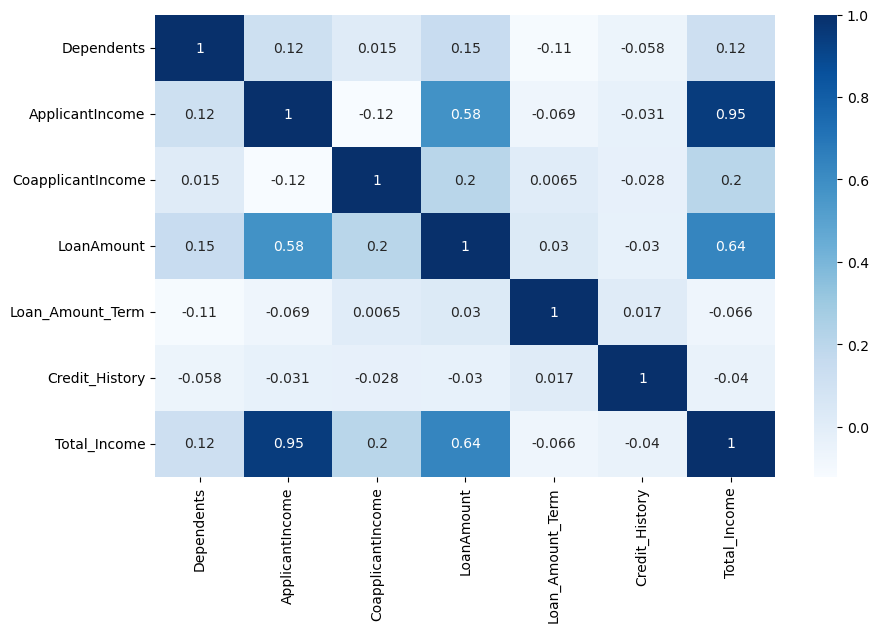

In [20]:
plt.figure (figsize = (10, 6))
correlation = X[num_cols].corr ()
sns.heatmap (correlation, annot = True, cmap = 'Blues')
plt.show

In [21]:
# Split the subsets for train and test purposes
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 0)
print (X_train.shape, end = ' ')
print (X_test.shape)
print (y_train.shape, end = ' ')
print (y_test.shape)

(400, 18) (100, 18)
(400,) (100,)


In [22]:
# Random Forest Classifier model
model = RandomForestClassifier ()
model.fit (X_train, y_train)

RandomForestClassifier()

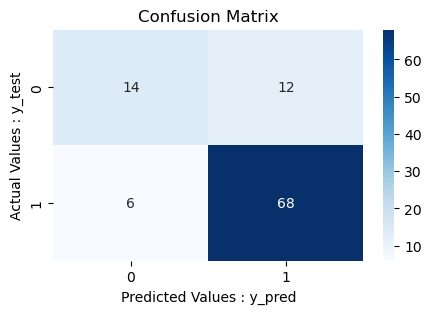

array([[14, 12],
       [ 6, 68]])

In [23]:
y_pred = model.predict (X_test)
cf_matrix = confusion_matrix (y_test, y_pred)

# Visualize the matrix using Seaborn
plt.figure (figsize = (5, 3))
plt.title ("Confusion Matrix")
sns.heatmap (cf_matrix, annot = True, cmap = 'Blues', fmt = 'd')
plt.ylabel ("Actual Values : y_test")
plt.xlabel ("Predicted Values : y_pred")
plt.show ()

cf_matrix

In [24]:
# Accuracy
accuracy = accuracy_score (y_test, y_pred) * 100
print ("The model's accuracy is :", round (accuracy, 2), '%')

The model's accuracy is : 82.0 %


In [25]:
# Classification Report
print ("\t\t\tClassification report :\n", classification_report (y_test, y_pred))

			Classification report :
               precision    recall  f1-score   support

           N       0.70      0.54      0.61        26
           Y       0.85      0.92      0.88        74

    accuracy                           0.82       100
   macro avg       0.77      0.73      0.75       100
weighted avg       0.81      0.82      0.81       100



In [26]:
scores = cross_val_score (model, X_train, y_train, cv = 10)
np.mean (scores)

0.7725000000000001

In [27]:
score = model.score (X_test, y_test)
score

0.82

#### Save the model to a file

In [28]:
import pickle

file_name = 'Random_Forest.sav'
pickle.dump (model, open (file_name, 'wb'))

print (f"Random Forest Classifier saved as {file_name}")

Random Forest Classifier saved as Random_Forest.sav
